
<h1 align=left><font size = 5>Exploratory Data Analysis Report</font></h1>

Capstone Project: Predicting and Explaining Caravan Policy Ownership

CIND820 Big Data Analytics Project

Student Name : Manohari Wijesooriya

##  **Introduction**

A Norwegian insurance company was interested in a machine learning solution to find best customers to market its caravan insurance product. Without sending mass email to all customers, it is cost effective for the company to identify best possible customers who will buy caravan insurance and only approach those customers.

**Dataset**: Insurance Company Benchmark (COIL 2000). This data set used in the CoIL 2000 Challenge contains information on customers of an insurance company. The data consists of 86 variables and includes product usage data and socio-demographic data
Dataset can be found in this link : https://archive.ics.uci.edu/ml/datasets/Insurance+Company+Benchmark+%28COIL+2000%29


**Reserch questions**

Q1. Predict which customers are potentially interested in a caravan insurance policy.

Q2. Describe the actual or potential customers; and possibly explain why these customers buy a caravan policy.

Q3. How does Caravan Insurance ownership varies across different demographic areas, and can we create distinct profiles of Caravan Insurance customers based on sociodemographic data?

Q4. Predicting a customer's likelihood to purchase Caravan Insurance based on their sociodemographic characteristics

Q5. What frequent associations can be identified in the product ownership data?


##  **Approach**

*  Exploratory Data Analysis (EDA):

    *  1. Summary Statistics
    *   2. Profiling Report
    *   3. Data Cleaning
         *   3.1 Check for missing or invalid values
         *   3.2 Check duplicate records
         *   3.3 Check inconsistencies
         *   3.4 Check outliers

    *   4. Techniques
       * 4.1 Univariate analysis
       * 4.2 Bivariate analysis
       * 4.3 Multivariate analysis

    *   6. Variable transformation

    *  7. Descriptive Statistics -
            * measures of central tendency, dispersion, and shape of the data
    *  8. Data visualization

    * 9. Corellation


 Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
!pip install pandas-profiling
import pandas_profiling
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=66fec139b87492ec9bf06e1b9ae786adf8dc7f9306ec558417af54079f4d8391
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

<ipython-input-1-423feb437d68>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


load data and store in dataframe df_ori:

In [ ]:
df_ori = pd.read_csv("/content/ticdata2000.txt",  delimiter = "\t",header=None)
df_ori.head()



0   1   2   3   4   5   6   7   8   9   ...  76  77  78  79  80  81  82  \
0  33   1   3   2   8   0   5   1   3   7  ...   0   0   0   1   0   0   0   
1  37   1   2   2   8   1   4   1   4   6  ...   0   0   0   1   0   0   0   
2  37   1   2   2   8   0   4   2   4   3  ...   0   0   0   1   0   0   0   
3   9   1   3   3   3   2   3   2   4   5  ...   0   0   0   1   0   0   0   
4  40   1   4   2  10   1   4   1   4   7  ...   0   0   0   1   0   0   0   

   83  84  85  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   0   0   0  
4   0   0   0  

[5 rows x 86 columns]

In [ ]:
# Add column headings
# column names from the data dictionary
#df_ori.columns=['MOSTYPE',	'MAANTHUI',	'MGEMOMV',	'MGEMLEEF',	'MOSHOOFD',	'MGODRK',	'MGODPR',	'MGODOV',	'MGODGE',	'MRELGE',	'MRELSA',	'MRELOV',	'MFALLEEN',	'MFGEKIND',	'MFWEKIND',	'MOPLHOOG',	'MOPLMIDD',	'MOPLLAAG',	'MBERHOOG',	'MBERZELF',	'MBERBOER',	'MBERMIDD',	'MBERARBG',	'MBERARBO',	'MSKA',	'MSKB1',	'MSKB2',	'MSKC',	'MSKD',	'MHHUUR',	'MHKOOP',	'MAUT1',	'MAUT2',	'MAUT0',	'MZFONDS',	'MZPART',	'MINKM30',	'MINK3045',	'MINK4575',	'MINK7512',	'MINK123M',	'MINKGEM',	'MKOOPKLA',	'PWAPART',	'PWABEDR',	'PWALAND',	'PPERSAUT',	'PBESAUT',	'PMOTSCO',	'PVRAAUT',	'PAANHANG',	'PTRACTOR',	'PWERKT',	'PBROM',	'PLEVEN',	'PPERSONG',	'PGEZONG',	'PWAOREG',	'PBRAND',	'PZEILPL',	'PPLEZIER',	'PFIETS',	'PINBOED',	'PBYSTAND',	'AWAPART',	'AWABEDR',	'AWALAND',	'APERSAUT',	'ABESAUT',	'AMOTSCO',	'AVRAAUT',	'AAANHANG',	'ATRACTOR',	'AWERKT',	'ABROM',	'ALEVEN',	'APERSONG',	'AGEZONG',	'AWAOREG',	'ABRAND',	'AZEILPL',	'APLEZIER',	'AFIETS',	'AINBOED',	'ABYSTAND',	'CARAVAN']
# English coulmn names for ease of reference. 1 - 43 are demographic varaibles (column name with prefix sd_), values based on zip code.
#44-86 are product ownership of insurance customers (column name with prefix po_).  target varaible : po_ins_pol_caravan
#df_ori.columns=['cust_subtype',	'no_of_houses',	'avg_household',	'avg_age_band',	'cust_maintype',	'religion_catholic',	'religion_protestant',	'religion_other',	'religion_no',	'rel_married',	'rel_living_tg',	'rel_other',	'rel_no_singles',	'hshold_wo_children',	'hshold_w_children',	'education_higher',	'education_medium',	'education_lower',	'empst_high',	'empst_Entrepr ',	'empst_farmer',	'empst_mdl_mgmt',	'empst_skill_labour',	'empst_unskill_labour',	'socialclassA',	'socialclassB1',	'socialclassB2',	'socialclassC',	'socialclassD',	'rentedhouse',	'homeowners',	'car_1',	'car_2',	'car_0',	'health_ins_national',	'health_ins_private',	'income_l_30k',	'income_30k_45k',	'income_45k_75k',	'income_75k_122k',	'income_g_123k',	'income_avg',	'p_power_class',	'ins_pol_thirdparty_pvt',	'ins_pol_thirdparty_firms',	'ins_pol_thirdparty_agri',	'ins_pol_car',	'ins_pol_del_van',	'ins_pol_motorcycle_sc',	'ins_pol_lorry',	'ins_pol_trailer',	'ins_pol_tractor',	'ins_pol_agri_machines',	'ins_pol_moped',	'ins_pol_life',	'ins_pol_accident_ins_pvt',	'ins_pol_accident_ins_fam',	'ins_pol_disability',	'ins_pol_fire',	'ins_pol_surfboard',	'ins_pol_boat',	'ins_pol_bicycle',	'ins_pol_property',	'ins_pol_social security',	'no_ins_pol_thirdparty_pvt',	'no_ins_pol_thirdparty_firms',	'no_ins_pol_thirdparty_agri',	'no_ins_pol_car',	'no_ins_pol_del_van',	'no_ins_pol_motorcycle_sc',	'no_ins_pol_lorry',	'no_ins_pol_trailer',	'no_ins_pol_tractor',	'no_ins_pol_agri_machines',	'no_ins_pol_moped',	'no_ins_pol_life',	'no_ins_pol_accident_ins_pvt',	'no_ins_pol_accident_ins_fam',	'no_ins_pol_disability',	'no_ins_pol_fire',	'no_ins_pol_surfboard',	'no_ins_pol_boat',	'no_ins_pol_bicycle',	'no_ins_pol_property',	'no_ins_pol_social security',	'no_ins_pol_caravan']
df_ori.columns=['sd_cust_subtype' ,	'sd_no_of_houses' ,	'sd_avg_household' ,	'sd_avg_age_band' ,	'sd_cust_maintype' ,	'sd_religion_catholic' ,	'sd_religion_protestant' ,	'sd_religion_other' ,	'sd_religion_no' ,	'sd_rel_married' ,	'sd_rel_living_tg' ,	'sd_rel_other' ,	'sd_rel_no_singles' ,	'sd_hshold_wo_children' ,	'sd_hshold_w_children' ,	'sd_education_higher' ,	'sd_education_medium' ,	'sd_education_lower' ,	'sd_empst_high' ,	'sd_empst_Entrepr' ,	'sd_empst_farmer' ,	'sd_empst_mdl_mgmt' ,	'sd_empst_skill_labour' ,	'sd_empst_unskill_labour' ,	'sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_rentedhouse' ,	'sd_homeowners' ,	'sd_car_1' ,	'sd_car_2' ,	'sd_car_0' ,	'sd_health_ins_national' ,	'sd_health_ins_private' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class' ,	'po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ,	'po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ,	'po_ins_pol_caravan']

df_ori


sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
0                  33                1                 3                2   
1                  37                1                 2                2   
2                  37                1                 2                2   
3                   9                1                 3                3   
4                  40                1                 4                2   
...               ...              ...               ...              ...   
5817               36                1                 1                2   
5818               35                1                 4                4   
5819               33                1                 3                4   
5820               34                1                 3                2   
5821               33                1                 3                3   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
0                    8                     0                       5   
1                    8                     1                       4   
2                    8                     0                       4   
3                    3                     2                       3   
4                   10                     1                       4   
...                ...                   ...                     ...   
5817                 8                     0                       6   
5818                 8                     1                       4   
5819                 8                     0                       6   
5820                 8                     0                       7   
5821                 8                     0                       6   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
0                     1               3               7  ...   
1                     1               4               6  ...   
2                     2               4               3  ...   
3                     2               4               5  ...   
4                     1               4               7  ...   
...                 ...             ...             ...  ...   
5817                  1               2               1  ...   
5818                  1               4               6  ...   
5819                  0               3               5  ...   
5820                  0               2               7  ...   
5821                  1               2               7  ...   

      po_no_ins_pol_accident_ins_pvt  po_no_ins_pol_accident_ins_fam  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   
...                              ...                             ...   
5817                               0                               0   
5818                               0                               0   
5819                               0                               0   
5820                               0                               0   
5821                               0                               0   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
0                            0                   1                        0   
1                            0                   1                        0   
2                            0                   1                        0   
3                            0                   1                        0   
4                            0                   1                        0   
...                        ...                 ...                      ...   
5817                         

In [ ]:
# save file with headings to use in other tools
#df_ori.to_csv('/content/ticdata2000_wheading.csv')

In [ ]:
print('no of records and columns ',df_ori.shape)
# list the data types for each column
df_ori.dtypes

#df_x=df_ori.iloc[:,0:8]
#df_x.dtypes

no of records and columns  (5822, 86)


sd_cust_subtype                  int64
sd_no_of_houses                  int64
sd_avg_household                 int64
sd_avg_age_band                  int64
sd_cust_maintype                 int64
                                 ...  
po_no_ins_pol_boat               int64
po_no_ins_pol_bicycle            int64
po_no_ins_pol_property           int64
po_no_ins_pol_social security    int64
po_ins_pol_caravan               int64
Length: 86, dtype: object

# 1. Summary Statistics

In [ ]:
# Summary statistics of dataframe
# We split 86 attributes to 5 subsets to examine summary statistics as it dispalys maximum 20 attributes on table
# checking columns by batches.
df_a=df_ori.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
df_b=df_ori.iloc[:,[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
df_c=df_ori.iloc[:,[40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59]]
df_d=df_ori.iloc[:,[60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79]]
df_e=df_ori.iloc[:,[80,81,82,83,84,85]]
display(df_a.describe())
display(df_b.describe())
display(df_c.describe())
display(df_d.describe())
display(df_e.describe())


sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
count      5822.000000      5822.000000       5822.000000      5822.000000   
mean         24.253349         1.110615          2.678805         2.991240   
std          12.846706         0.405842          0.789835         0.814589   
min           1.000000         1.000000          1.000000         1.000000   
25%          10.000000         1.000000          2.000000         2.000000   
50%          30.000000         1.000000          3.000000         3.000000   
75%          35.000000         1.000000          3.000000         3.000000   
max          41.000000        10.000000          5.000000         6.000000   

       sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
count       5822.000000           5822.000000             5822.000000   
mean           5.773617              0.696496                4.626932   
std            2.856760              1.003234                1.715843   
min            1.000000              0.000000                0.000000   
25%            3.000000              0.000000                4.000000   
50%            7.000000              0.000000                5.000000   
75%            8.000000              1.000000                6.000000   
max           10.000000              9.000000                9.000000   

       sd_religion_other  sd_religion_no  sd_rel_married  sd_rel_living_tg  \
count        5822.000000     5822.000000     5822.000000       5822.000000   
mean            1.069907        3.258502        6.183442          0.883545   
std             1.017503        1.597647        1.909482          0.965924   
min             0.000000        0.000000        0.000000          0.000000   
25%             0.000000        2.000000        5.000000          0.000000   
50%             1.000000        3.000000        6.000000          1.000000   
75%             2.000000        4.000000        7.000000          1.000000   
max             5.000000        9.000000        9.000000          7.000000   

       sd_rel_other  sd_rel_no_singles  sd_hshold_wo_children  \
count   5822.000000        5822.000000            5822.000000   
mean       2.290450           1.887667               3.230333   
std        1.722645           1.799928               1.619973   
min        0.000000           0.000000               0.000000   
25%        1.000000           0.000000               2.000000   
50%        2.000000           2.000000               3.000000   
75%        3.000000           3.000000               4.000000   
max        9.000000           9.000000               9.000000   

       sd_hshold_w_children  sd_education_higher  sd_education_medium  \
count           5822.000000          5822.000000          5822.000000   
mean               4.300240             1.461010             3.351254   
std                2.005283             1.622967             1.761052   
min                0.000000             0.000000             0.000000   
25%                3.000000             0.000000             2.000000   
50%                4.000000             1.000000             3.000000   
75%                6.000000             2.000000             4.000000   
max                9.000000             9.000000             9.000000   

       sd_education_lower  sd_empst_high  sd_empst_Entrepr  
count         5822.000000    5822.000000       5822.000000  
mean             4.572484       1.895053          0.397973  
std              2.298125       1.798321          0.775073  
min              0.000000       0.000000          0.000000  
25%              3.000000       0.000000          0.000000  
50%              5.000000       2.000000          0.000000  
75%              6.000000       3.000000          1.000000  
max              9.000000       9.000000          5.000000

sd_empst_farmer  sd_empst_mdl_mgmt  sd_empst_skill_labour  \
count      5822.000000        5822.000000            5822.000000   
mean          0.522329           2.899004               2.219856   
std           1.056926           1.839675               1.730840   
min           0.000000           0.000000               0.000000   
25%           0.000000           2.000000               1.000000   
50%           0.000000           3.000000               2.000000   
75%           1.000000           4.000000               3.000000   
max           9.000000           9.000000               9.000000   

       sd_empst_unskill_labour  sd_socialclassA  sd_socialclassB1  \
count              5822.000000      5822.000000       5822.000000   
mean                  2.306424         1.620749          1.606836   
std                   1.692843         1.722882          1.330664   
min                   0.000000         0.000000          0.000000   
25%                   1.000000         0.000000          1.000000   
50%                   2.000000         1.000000          2.000000   
75%                   3.000000         2.000000          2.000000   
max                   9.000000         9.000000          9.000000   

       sd_socialclassB2  sd_socialclassC  sd_socialclassD  sd_rentedhouse  \
count       5822.000000      5822.000000      5822.000000     5822.000000   
mean           2.202508         3.758674         1.067331        4.236860   
std            1.529319         1.935568         1.303175        3.089302   
min            0.000000         0.000000         0.000000        0.000000   
25%            1.000000         2.000000         0.000000        2.000000   
50%            2.000000         4.000000         1.000000        4.000000   
75%            3.000000         5.000000         2.000000        7.000000   
max            9.000000         9.000000         9.000000        9.000000   

       sd_homeowners     sd_car_1     sd_car_2     sd_car_0  \
count    5822.000000  5822.000000  5822.000000  5822.000000   
mean        4.771728     6.040364     1.316386     1.959464   
std         3.089837     1.552799     1.203072     1.599714   
min         0.000000     0.000000     0.000000     0.000000   
25%         2.000000     5.000000     0.000000     1.000000   
50%         5.000000     6.000000     1.000000     2.000000   
75%         7.000000     7.000000     2.000000     3.000000   
max         9.000000     9.000000     7.000000     9.000000   

       sd_health_ins_national  sd_health_ins_private  sd_income_l_30k  \
count             5822.000000            5822.000000      5822.000000   
mean                 6.277053               2.728959         2.573686   
std                  1.978675               1.981893         2.086099   
min                  0.000000               0.000000         0.000000   
25%                  5.000000               1.000000         1.000000   
50%                  7.000000               2.000000         2.000000   
75%                  8.000000               4.000000         4.000000   
max                  9.000000               9.000000         9.000000   

       sd_income_30k_45k  sd_income_45k_75k  sd_income_75k_122k  
count        5822.000000        5822.000000         5822.000000  
mean            3.536070           2.731364            0.796118  
std             1.882656           1.927738            1.162829  
min             0.000000           0.000000            0.000000  
25%             2.000000           1.000000            0.000000  
50%             4.000000           3.000000            0.000000  
75%             5.000000           4.000000            1.000000  
max             9.000000           9.000000            9.000000

sd_income_g_123k  sd_income_avg  sd_p_power_class  \
count       5822.000000    5822.000000       5822.000000   
mean           0.202679       3.784438          4.236345   
std            0.551557       1.317783          2.007150   
min            0.000000       0.000000          1.000000   
25%            0.000000       3.000000          3.000000   
50%            0.000000       4.000000          4.000000   
75%            0.000000       4.000000          6.000000   
max            9.000000       9.000000          8.000000   

       po_ins_pol_thirdparty_pvt  po_ins_pol_thirdparty_firms  \
count                5822.000000                  5822.000000   
mean                    0.771213                     0.040021   
std                     0.958623                     0.362680   
min                     0.000000                     0.000000   
25%                     0.000000                     0.000000   
50%                     0.000000                     0.000000   
75%                     2.000000                     0.000000   
max                     3.000000                     6.000000   

       po_ins_pol_thirdparty_agri  po_ins_pol_car  po_ins_pol_del_van  \
count                 5822.000000     5822.000000         5822.000000   
mean                     0.071625        2.970457            0.048265   
std                      0.499980        2.920669            0.531346   
min                      0.000000        0.000000            0.000000   
25%                      0.000000        0.000000            0.000000   
50%                      0.000000        5.000000            0.000000   
75%                      0.000000        6.000000            0.000000   
max                      4.000000        8.000000            7.000000   

       po_ins_pol_motorcycle_sc  po_ins_pol_lorry  po_ins_pol_trailer  \
count               5822.000000       5822.000000         5822.000000   
mean                   0.175369          0.009447            0.020955   
std                    0.897222          0.244675            0.212738   
min                    0.000000          0.000000            0.000000   
25%                    0.000000          0.000000            0.000000   
50%                    0.000000          0.000000            0.000000   
75%                    0.000000          0.000000            0.000000   
max                    7.000000          9.000000            5.000000   

       po_ins_pol_tractor  po_ins_pol_agri_machines  po_ins_pol_moped  \
count         5822.000000               5822.000000       5822.000000   
mean             0.092580                  0.013054          0.215046   
std              0.603076                  0.228906          0.813133   
min              0.000000                  0.000000          0.000000   
25%              0.000000                  0.000000          0.000000   
50%              0.000000                  0.000000          0.000000   
75%              0.000000                  0.000000          0.000000   
max              6.000000                  6.000000          6.000000   

       po_ins_pol_life  po_ins_pol_accident_ins_pvt  \
count      5822.000000                  5822.000000   
mean          0.194778                     0.013741   
std           0.898100                     0.209260   
min           0.000000                     0.000000   
25%           0.000000                     0.000000   
50%           0.000000                     0.000000   
75%           0.000000                     0.000000   
max           9.000000                     6.000000   

       po_ins_pol_accident_ins_fam  po_ins_pol_disability  po_ins_pol_fire  \
count                  5822.000000            5822.000000      5822.000000   
mean                      0.015287               0.023531         1.827722   
std                       0.192471               0.375274         1.879290   
min                       0.000000               0.000000         0.000000   
25%                 

po_ins_pol_boat  po_ins_pol_bicycle  po_ins_pol_property  \
count      5822.000000         5822.000000           5822.00000   
mean          0.018894            0.025249              0.01563   
std           0.273028            0.156894              0.20456   
min           0.000000            0.000000              0.00000   
25%           0.000000            0.000000              0.00000   
50%           0.000000            0.000000              0.00000   
75%           0.000000            0.000000              0.00000   
max           6.000000            1.000000              6.00000   

       po_ins_pol_social security  po_no_ins_pol_thirdparty_pvt  \
count                 5822.000000                   5822.000000   
mean                     0.047578                      0.402954   
std                      0.409016                      0.492631   
min                      0.000000                      0.000000   
25%                      0.000000                      0.000000   
50%                      0.000000                      0.000000   
75%                      0.000000                      1.000000   
max                      5.000000                      2.000000   

       po_no_ins_pol_thirdparty_firms  po_no_ins_pol_thirdparty_agri  \
count                     5822.000000                    5822.000000   
mean                         0.014772                       0.020611   
std                          0.134133                       0.142092   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                          0.000000                       0.000000   
75%                          0.000000                       0.000000   
max                          5.000000                       1.000000   

       po_no_ins_pol_car  po_no_ins_pol_del_van  po_no_ins_pol_motorcycle_sc  \
count        5822.000000            5822.000000                  5822.000000   
mean            0.562178               0.010477                     0.041051   
std             0.604767               0.129991                     0.228974   
min             0.000000               0.000000                     0.000000   
25%             0.000000               0.000000                     0.000000   
50%             1.000000               0.000000                     0.000000   
75%             1.000000               0.000000                     0.000000   
max             7.000000               4.000000                     8.000000   

       po_no_ins_pol_lorry  po_no_ins_pol_trailer  po_no_ins_pol_tractor  \
count          5822.000000            5822.000000            5822.000000   
mean              0.002233               0.012539               0.033665   
std               0.062819               0.125775               0.240755   
min               0.000000               0.000000               0.000000   
25%               0.000000               0.000000               0.000000   
50%               0.000000               0.000000               0.000000   
75%               0.000000               0.000000               0.000000   
max               3.000000               3.000000               4.000000   

       po_no_ins_pol_agri_machines  po_no_ins_pol_moped  po_no_ins_pol_life  \
count                  5822.000000          5822.000000         5822.000000   
mean                      0.006183             0.070423            0.076606   
std                       0.124189             0.265112            0.377569   
min                       0.000000             0.000000            0.000000   
25%                       0.000000             0.000000            0.000000   
50%                       0.000000             0.000000            0.000000   
75%                       0.000000             0.000000            0.000000   
max                       6.000000             2.000000            8.000000   

       po_no_ins_pol_accident_in

po_no_ins_pol_surfboard  po_no_ins_pol_boat  po_no_ins_pol_bicycle  \
count              5822.000000         5822.000000            5822.000000   
mean                  0.000515            0.006012               0.031776   
std                   0.022696            0.081632               0.210986   
min                   0.000000            0.000000               0.000000   
25%                   0.000000            0.000000               0.000000   
50%                   0.000000            0.000000               0.000000   
75%                   0.000000            0.000000               0.000000   
max                   1.000000            2.000000               3.000000   

       po_no_ins_pol_property  po_no_ins_pol_social security  \
count             5822.000000                    5822.000000   
mean                 0.007901                       0.014256   
std                  0.090463                       0.119996   
min                  0.000000                       0.000000   
25%                  0.000000                       0.000000   
50%                  0.000000                       0.000000   
75%                  0.000000                       0.000000   
max                  2.000000                       2.000000   

       po_ins_pol_caravan  
count         5822.000000  
mean             0.059773  
std              0.237087  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000

♈ It is noticed min/max of variables lies between values as described in the data dictionary.

eg: sd_cust_subtype  1 - 41

sd_religion_protestant 0 – 9

po_ins_pol_property    0 - 9
♈


# 2. Profiling Report

In [ ]:
#  Get Exploratory data analysis report.
!pip install pandas-profiling
import pandas_profiling

In [ ]:
# full profile report
profile = df_ori.profile_report(title='Pandas Profiling Report - complete report')
profile.to_file(output_file="Pandas Profiling Report - complete report — Insurance Benchmark .html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# since the dataframe is too large, we produce profile report to view variable report. (corelation report will be generated separatly)
profile1 = df_ori.profile_report(title='Pandas Profiling Report - Original file',  minimal=True)
profile1


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile1.to_file(output_file="Pandas Profiling Report — Original file .html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 3.  Data Cleaning



3.1 Check missing or invalid values

In [ ]:
# checking all missing values in the dataset.
# here we check missing value count again for confirmation.
df_ori.isna().sum()

sd_cust_subtype                  0
sd_no_of_houses                  0
sd_avg_household                 0
sd_avg_age_band                  0
sd_cust_maintype                 0
                                ..
po_no_ins_pol_boat               0
po_no_ins_pol_bicycle            0
po_no_ins_pol_property           0
po_no_ins_pol_social security    0
po_ins_pol_caravan               0
Length: 86, dtype: int64

In [ ]:
# Count total NaN at each row in a DataFrame
for i in range(len(df_ori.index)) :
    print(" Total NaN in row", i + 1, ":",
          df_ori.iloc[i].isnull().sum())

♈there are no missing values in the file.♈

Checking if minimum maximum values of attributes are as explained in the dataset.

In [ ]:
#df_ori.loc[df_ori['sd_religion_protestant']>9,'this is ']='False'
df_ori['check_1_41'] = df_ori['sd_cust_subtype'].apply(lambda x: 'True' if (x >= 1 and  x <= 41) else 'False')
print("sd_cust_subtype \n", df_ori[df_ori.columns[df_ori.iloc[87] == 'False']])
df_1=df_ori[['sd_no_of_houses' ,'sd_cust_maintype' ]]
print("sd_no_of_houses sd_cust_maintype  values < 1 \n",(df_1<1).any(),"sd_no_of_houses sd_cust_maintype  values > 10 \n", (df_1>10).any())
df_2=df_ori[['sd_avg_household' ,  'sd_avg_age_band']]
print("sd_avg_household  sd_avg_age_band   values < 1 \n",(df_2<1).any(),"sd_avg_household  sd_avg_age_band   values > 6 \n", (df_2>6).any())
df_3=df_ori.iloc[:,[6,	7,	8,	9,	10,	11,	12,	13,	14,	15,	16,	17,	18,	19,	20,	21,	22,	23,	24,	25,	26,	27,	28,	29,	30,	31,	32,	33,	34,	35,	36,	37,	38,	39,	40,	41,	42,	43,	44,	45,	46,	47,	48,	49,	50,	51,	52,	53,	54,	55,	56,	57,	58,	59,	60,	61,	62,	63]]
print("columns 6- 43   values < 0 \n",(df_3<0).any(),"columns 6 - 43   values > 9 \n", (df_3>9).any())


sd_cust_subtype 
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[5822 rows x 0 columns]
sd_no_of_houses sd_cust_maintype  values < 1 
 sd_no_of_houses     False
sd_cust_maintype    False
dtype: bool sd_no_of_houses sd_cust_maintype  values > 10 
 sd_no_of_houses     False
sd_cust_maintype    False
dtype: bool
sd_avg_household  sd_avg_age_band   values < 1 
 sd_avg_household    False
sd_avg_age_band     False
dtype: bool sd_avg_household  sd_avg_age_band   values > 6 
 sd_avg_household    False
sd_avg_age_band     False
dtype: bool
columns 6- 43   values < 0 
 sd_religion_protestant         False
sd_religion

♈ minimum maximum of attributes  are in ranges as explained in the data dictionary. ♈

In [ ]:
# these attributes have all 0. We will drop these varaibles.
#'po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'
print(df_ori['po_ins_pol_agri_machines'].value_counts(),"\n")
print(df_ori['po_ins_pol_lorry'].value_counts())
print(df_ori['po_no_ins_pol_agri_machines'].value_counts())
print(df_ori['po_no_ins_pol_lorry'].value_counts())

# we will drop these varaibles
df_2=df_ori.drop(['po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'],axis=1)
df_2.shape

0    5801
4       8
3       6
2       4
6       3
Name: po_ins_pol_agri_machines, dtype: int64 

0    5813
6       7
4       1
9       1
Name: po_ins_pol_lorry, dtype: int64
0    5801
1      12
2       6
3       2
6       1
Name: po_no_ins_pol_agri_machines, dtype: int64
0    5813
1       6
2       2
3       1
Name: po_no_ins_pol_lorry, dtype: int64


(5822, 83)

**3.1 identifying and addressing duplicate entries**

1) function df_ori.duplicated() shows 602 duplicates.

2) Further examined duplicates and checked records copying to a csv file.






In [ ]:
# Method1: checking duplicates
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df_ori[df_ori.duplicated()]

In [ ]:
display(duplicate)

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
4345               10                1                 3                3   
2427               10                1                 3                3   
1539               10                1                 4                3   
5360               10                1                 4                3   
2225               10                1                 4                3   
...               ...              ...               ...              ...   
2549                9                1                 4                3   
2145                9                1                 4                3   
2871                9                1                 4                3   
5528                9                1                 4                3   
5219                9                2                 3                2   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
4345                 3                     0                       4   
2427                 3                     2                       3   
1539                 3                     0                       5   
5360                 3                     0                       5   
2225                 3                     0                       5   
...                ...                   ...                     ...   
2549                 3                     1                       3   
2145                 3                     1                       3   
2871                 3                     1                       3   
5528                 3                     1                       3   
5219                 3                     0                       5   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
4345                  2               4               7  ...   
2427                  0               5               7  ...   
1539                  2               3               7  ...   
5360                  2               3               7  ...   
2225                  2               3               7  ...   
...                 ...             ...             ...  ...   
2549                  1               5               7  ...   
2145                  1               5               7  ...   
2871                  1               5               7  ...   
5528                  1               5               7  ...   
5219                  0               4               9  ...   

      po_no_ins_pol_accident_ins_fam  po_no_ins_pol_disability  \
4345                               0                         0   
2427                               0                         0   
1539                               0                         0   
5360                               0                         0   
2225                               0                         0   
...                              ...                       ...   
2549                               0                         0   
2145                               0                         0   
2871                               0                         0   
5528                               0                         0   
5219                               0                         0   

      po_no_ins_pol_fire  po_no_ins_pol_surfboard  po_no_ins_pol_boat  \
4345                   1                        0                   0   
2427                   0                        0                   0   
1539                   0                        0                   0   
5360                   0                        0                   0   
2225                   1                        0                   0   
...                  ...                      ...                 ...   
2549                   0                        0                   0   
2145                   0                        0                   0 

In [ ]:
# Method2: checking duplicates
# create a key 'sd_combined' combining contents of all columns and get counts of the key
columns = df_ori.columns.tolist()
df_ori['df_combined'] = df_ori.apply(lambda x: '_'.join([str(x[i]) for i in columns]), axis=1)

In [ ]:
# these 6 records have same results
testA = df_ori[['df_combined']]
summaryA=testA.groupby('df_combined').filter(lambda x: len(x) == 6)
idnos = summaryA.index.tolist()
#summaryB=df_ori.loc[[5820,	3546,	3462,	4363,	4295,	4175 ]]
summaryB=df_ori.loc[idnos]
summaryB.to_csv('/content/duplicate_6.csv') # outputting to a csv file to examine records.
summaryA

df_combined
3462  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
3546  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
4175  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
4295  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
4363  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...
5820  34_1_3_2_8_0_7_0_2_7_2_0_0_4_5_0_2_7_0_2_0_2_4...

6 records with index numbers 5820,3546,3462,4363, 4295, 4175 have same values in all attributes.

In [ ]:
testA.groupby('df_combined').filter(lambda x: len(x) > 1)

In [ ]:
# output records with index 739, 4345
df_ori.loc[[739, 4345 ]]

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
739                10                1                 3                3   
4345               10                1                 3                3   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
739                  3                     0                       4   
4345                 3                     0                       4   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
739                   2               4               7  ...   
4345                  2               4               7  ...   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
739                          0                   1                        0   
4345                         0                   1                        0   

      po_no_ins_pol_boat  po_no_ins_pol_bicycle  po_no_ins_pol_property  \
739                    0                      0                       0   
4345                   0                      0                       0   

      po_no_ins_pol_social security  po_ins_pol_caravan  \
739                               0                   0   
4345                              0                   0   

                                            df_combined  \
739   10_1_3_3_3_0_4_2_4_7_1_2_0_0_9_0_9_0_1_0_0_3_3...   
4345  10_1_3_3_3_0_4_2_4_7_1_2_0_0_9_0_9_0_1_0_0_3_3...   

                                            sd_combined  
739   10_1_3_3_3_0_4_2_4_7_1_2_0_0_9_0_9_0_1_0_0_3_3...  
4345  10_1_3_3_3_0_4_2_4_7_1_2_0_0_9_0_9_0_1_0_0_3_3...  

[2 rows x 88 columns]

♈**Duplicate records were not removed from the file**

sociodemographic data are based on postal code. Customers from same postal code will have same data.Attributes from # 7 - 43 are scaled from 0 - 9 represent % range. eg . **4**  37 - 49%
The product variables represent a scale. Ex. 'po_ins_pol_car' : Contribution to car policy have values (0, 4, 6, 8)
It is possible to have more than one customer in the same category.

the dataset doesn’t provide a policy or customer number.
Hence, we decided to keep all records assuming all these are from genuine customers.
Duplicate records were not removed from the file
♈

**1.3 Detecting and resolving inconsistencies**

Are there any policy count while there is a policy value?

eg: po_ins_pol_property: scale of insured amount,
po_no_ins_pol_property : number of policies

When one attribute has a value, the other should also have a value.


In [ ]:

df_4=df_ori[['po_ins_pol_property',  'po_no_ins_pol_property']]
df_4.groupby(['po_ins_pol_property',  'po_no_ins_pol_property']).size()

po_ins_pol_property  po_no_ins_pol_property
0                    0                         5777
1                    1                           18
2                    1                           16
3                    1                            6
4                    1                            2
                     2                            1
5                    1                            1
6                    1                            1
dtype: int64

In [ ]:
# define function to check attributes
def check_attributes (df, var1,var2):
  # if var1  = 0 and var2 > 0 or var1  > 0 and var2 =0 then true.
  # if this statement is true then there is a incositiancy in var1 and var2 values in the particular record.
  print('Checking inconsistancy in attributes po_ins_pol_property,  po_no_ins_pol_property \n', (df[(df[var1] ==0) &  (df[var2]==1)]) | (df[(df[var1] ==1) &  (df[var2]==0)]))

check_attributes(df_ori, 'po_ins_pol_thirdparty_pvt','po_no_ins_pol_thirdparty_pvt')
check_attributes(df_ori, 'po_ins_pol_thirdparty_firms','po_no_ins_pol_thirdparty_firms')
check_attributes(df_ori, 'po_ins_pol_thirdparty_agri','po_no_ins_pol_thirdparty_agri')
check_attributes(df_ori, 'po_ins_pol_car','po_no_ins_pol_car')
check_attributes(df_ori, 'po_ins_pol_del_van','po_no_ins_pol_del_van')
check_attributes(df_ori, 'po_ins_pol_motorcycle_sc','po_no_ins_pol_motorcycle_sc')
check_attributes(df_ori, 'po_ins_pol_lorry','po_no_ins_pol_lorry')
check_attributes(df_ori, 'po_ins_pol_trailer','po_no_ins_pol_trailer')
check_attributes(df_ori, 'po_ins_pol_tractor','po_no_ins_pol_tractor')
check_attributes(df_ori, 'po_ins_pol_agri_machines','po_no_ins_pol_agri_machines')
check_attributes(df_ori, 'po_ins_pol_moped','po_no_ins_pol_moped')
check_attributes(df_ori, 'po_ins_pol_life','po_no_ins_pol_life')
check_attributes(df_ori, 'po_ins_pol_accident_ins_pvt','po_no_ins_pol_accident_ins_pvt')
check_attributes(df_ori, 'po_ins_pol_accident_ins_fam','po_no_ins_pol_accident_ins_fam')
check_attributes(df_ori, 'po_ins_pol_disability','po_no_ins_pol_disability')
check_attributes(df_ori, 'po_ins_pol_fire','po_no_ins_pol_fire')
check_attributes(df_ori, 'po_ins_pol_surfboard','po_no_ins_pol_surfboard')
check_attributes(df_ori, 'po_ins_pol_boat','po_no_ins_pol_boat')
check_attributes(df_ori, 'po_ins_pol_bicycle','po_no_ins_pol_bicycle')
check_attributes(df_ori, 'po_ins_pol_property','po_no_ins_pol_property')
check_attributes(df_ori, 'po_ins_pol_social security','po_no_ins_pol_social security')



Checking inconsistancy in attributes po_ins_pol_property,  po_no_ins_pol_property 
 Empty DataFrame
Columns: [sd_cust_subtype, sd_no_of_houses, sd_avg_household, sd_avg_age_band, sd_cust_maintype, sd_religion_catholic, sd_religion_protestant, sd_religion_other, sd_religion_no, sd_rel_married, sd_rel_living_tg, sd_rel_other, sd_rel_no_singles, sd_hshold_wo_children, sd_hshold_w_children, sd_education_higher, sd_education_medium, sd_education_lower, sd_empst_high, sd_empst_Entrepr , sd_empst_farmer, sd_empst_mdl_mgmt, sd_empst_skill_labour, sd_empst_unskill_labour, sd_socialclassA, sd_socialclassB1, sd_socialclassB2, sd_socialclassC, sd_socialclassD, sd_rentedhouse, sd_homeowners, sd_car_1, sd_car_2, sd_car_0, sd_health_ins_national, sd_health_ins_private, sd_income_l_30k, sd_income_30k_45k, sd_income_45k_75k, sd_income_75k_122k, sd_income_g_123k, sd_income_avg, sd_p_power_class, po_ins_pol_thirdparty_pvt, po_ins_pol_thirdparty_firms, po_ins_pol_thirdparty_agri, po_ins_pol_car, po_ins_po

♈ policy value and count attributes are consistant. We see results as expected. ♈

Do people in higher purchasing power has lower income level?

In [ ]:
df_4=df_ori[['sd_income_l_30k', 'sd_p_power_class']]
df_5=df_4[df_4['sd_p_power_class']==8]
df_5.groupby(['sd_income_l_30k']).size()
# check power class 7,8,9

sd_income_l_30k
0    207
1     77
2    102
3     27
4      5
5      1
6      5
7      1
9      1
dtype: int64

In [ ]:
groupby.df_4.size()

What is the income level of the customer with higest number of policies?

In [ ]:
df_6 = df_ori[['po_no_ins_pol_thirdparty_pvt', 'po_no_ins_pol_car', 'po_no_ins_pol_fire' ]]
df_6. loc[df_6['po_no_ins_pol_thirdparty_pvt']. idxmax()]


po_no_ins_pol_thirdparty_pvt    2
po_no_ins_pol_car               0
po_no_ins_pol_fire              1
Name: 1, dtype: int64

df_6. loc[df_6[''po_no_ins_pol_car'']. idxmax()]

In [ ]:
df_6. loc[df_6['po_no_ins_pol_car']. idxmax()]

po_no_ins_pol_thirdparty_pvt    0
po_no_ins_pol_car               7
po_no_ins_pol_fire              1
Name: 206, dtype: int64

In [ ]:
df_6. loc[df_6['po_no_ins_pol_fire']. idxmax()]

po_no_ins_pol_thirdparty_pvt    0
po_no_ins_pol_car               0
po_no_ins_pol_fire              7
Name: 1380, dtype: int64

In [ ]:
# output records with index 1380, 206
df_7=df_ori.iloc[:,[4, 0,3,  15, 18,20,24,28, 32,31,34,35,36,37,38,40,41,42,43,46,58, 64,67,79,85]]
display(df_7.loc[[1380, 206 ]])



sd_cust_maintype  sd_cust_subtype  sd_avg_age_band  sd_education_higher  \
1380                 9               38                2                    1   
206                  5               24                3                    0   

      sd_empst_high  sd_empst_farmer  sd_socialclassA  sd_socialclassD  \
1380              0                0                0                2   
206               5                0                1                2   

      sd_car_2  sd_car_1  ...  sd_income_g_123k  sd_income_avg  \
1380         2         6  ...                 0              3   
206          2         6  ...                 1              5   

      sd_p_power_class  po_ins_pol_thirdparty_pvt  po_ins_pol_car  \
1380                 4                          0               0   
206                  2                          0               8   

      po_ins_pol_fire  po_no_ins_pol_thirdparty_pvt  po_no_ins_pol_car  \
1380                4                             0                  0   
206                 4                             0                  7   

      po_no_ins_pol_fire  po_ins_pol_caravan  
1380                   7                   0  
206                    1                   0  

[2 rows x 25 columns]

♈ customer main type (5 Living well, 9 Conservative families )

customer sub type (24 Young, low educated , 38 Traditional families )
sd car 2 (2   11 - 23% chance of having 2 cars )
sd car 1  (6   63 - 75% chance of having 1 car)

values in socio demograpghic attributes confirms values in product attributes.
♈





**1.4 Check outliers**

In [ ]:
# by# some histogram plots

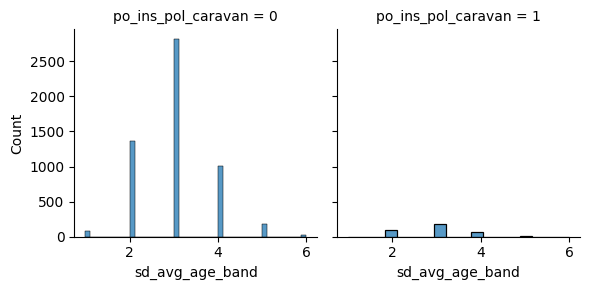

In [ ]:
# bi variate analysis
g = sns.FacetGrid(df_ori, col="po_ins_pol_caravan")
g.map(sns.histplot, "sd_avg_age_band")
g.savefig("Average_Age1.png")


♈ Outliers insurance customers - very small number of customers in age band 6
Outliers caravan policies - 1 and 6 . (most caravan customers are in average age band 3. ie.  40 - 50 years ♈

**Checking trends in multiple variables**

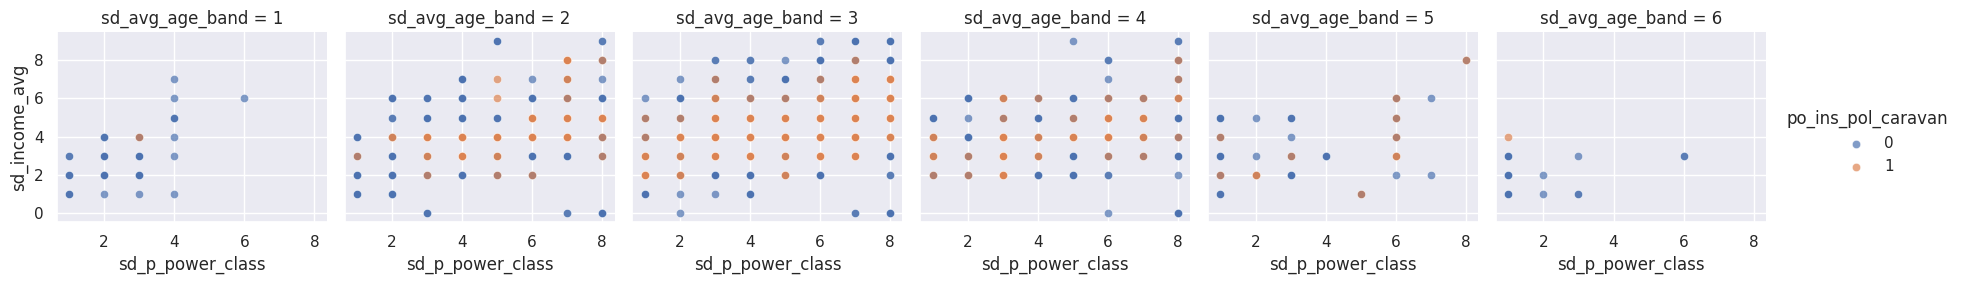

In [ ]:
# multivariate analysis
g = sns.FacetGrid(df_ori, col="sd_avg_age_band", hue="po_ins_pol_caravan")
g.map(sns.scatterplot, "sd_p_power_class", "sd_income_avg", alpha=.7)
g.add_legend()

 ♈We notice less number of insurance customers in age band 1 and 6 (age 20 - 30, 70 - 80).  It is obvious in age band 2 and 3 more insurance customers in  higher purchasing power class and higher income average ♈

In [ ]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

Box plots to identify patterns in data

In [ ]:
# outliers of income variables
df_sc=df_ori[['sd_socialclassA' ,	'sd_socialclassB1' ,	'sd_socialclassB2' ,	'sd_socialclassC' ,	'sd_socialclassD' ,	'sd_income_l_30k' ,	'sd_income_30k_45k' ,	'sd_income_45k_75k' ,	'sd_income_75k_122k' ,	'sd_income_g_123k' ,	'sd_income_avg' ,	'sd_p_power_class']]
px.box(df_sc)

♈**sd_socialclassA**  median = 1, there are very small number of cases in 6, 7 and 8. these are outliers. sd_socialclassA : 1 - 10% people in the area are in social class A.

**sd_socialclassC** - values of this veriable are well distributed (no outliers). median = 4.

**sd_income_g_123k** - median = 0. very small number of custoemrs fall into this category. values 1 - 8 are recognising as outliers. We undestand that mojority of insurance customers are not in income category greater than 123k.

**sd_p_power_class** median = 4. majority of insurance customers are in power class 4. values in this attribute is well distributed. there are no outliers.

**Checking insurance product variables**

Comparing distributions

Attributes with prefix **po_ins_pol_** represent insured amount in scale of 0 - 9 (0 no insurance, 7 f 5000 – 9999)

Attributes **po_no_ins_pol_** represent policy count.

In [ ]:
# outliers  of product variables - contribution to insurance policy
df_po_ins = df_ori[['po_ins_pol_thirdparty_pvt' ,	'po_ins_pol_thirdparty_firms' ,	'po_ins_pol_thirdparty_agri' ,	'po_ins_pol_car' ,	'po_ins_pol_del_van' ,	'po_ins_pol_motorcycle_sc' ,	'po_ins_pol_lorry' ,	'po_ins_pol_trailer' ,	'po_ins_pol_tractor' ,	'po_ins_pol_agri_machines' ,	'po_ins_pol_moped' ,	'po_ins_pol_life' ,	'po_ins_pol_accident_ins_pvt' ,	'po_ins_pol_accident_ins_fam' ,	'po_ins_pol_disability' ,	'po_ins_pol_fire' ,	'po_ins_pol_surfboard' ,	'po_ins_pol_boat' ,	'po_ins_pol_bicycle' ,	'po_ins_pol_property' ,	'po_ins_pol_social security' ]]
px.box(df_po_ins)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# outliers  of product variables - contribution to insurance policy'
df_po_no_ins = df_ori[['po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ]]
px.box(df_po_no_ins)


Output hidden; open in https://colab.research.google.com to view.

 ♈ Above 2 visuals give us an indication of distribution of various insurance products in the file. we notice minimal number of policies in most products  other than following.

po_ins_pol_thirdparty_pvt,  po_ins_pol_car, po_ins_pol_fire

Other than products thirdparty pvt, car and file, doesnt provide good amount of information.
**po_no_ins_pol_car** median = 1, upper q = 2,  values 3 - 7 are recognising as outliers.

♈

♈ **At this stage of the analysis, outliers are not removed. We we will examine attributes later as we use in various modelling algorithms.**  ♈

In [ ]:
# checking how much % of customers have caravan policy out of customers who has accident / boat policy
var1_counts =df_ori[df_ori['po_no_ins_pol_accident_ins_fam'] > 0]['po_ins_pol_caravan'].value_counts()
print('po_no_ins_pol_accident_ins_fam_%  \n',var1_counts / len(df_ori[df_ori['po_no_ins_pol_accident_ins_fam'] > 0]) * 100, "\n")

var2_counts =df_ori[df_ori['po_no_ins_pol_boat'] > 0]['po_ins_pol_caravan'].value_counts()
print('po_no_ins_pol_boat_%  \n',var2_counts / len(df_ori[df_ori['po_no_ins_pol_boat'] > 0]) * 100, "\n")

In [ ]:
df_ori['dr_po_no_ins_bt_ac_tr_mt'] = df_ori['po_no_ins_pol_accident_ins_fam'] +   df_ori['po_no_ins_pol_boat']
df_ori['dr_po_no_ins_bt_ac_tr_mt'] = np.where(df_ori['dr_po_no_ins_bt_ac_tr_mt'] > 0,1,0)

# 6. Carrying out variable transformations


Look at Caravan customers by zip code

since the sociodemographic data  variables are based on postal code, Here we are tryong to identify records from same postal code and give an arbitrary zipcode no.
This is to analyse variables by location, to find patterns in data.

In [ ]:
# separate sociodemographic variables
df_zcd= df_ori
df_sd = df_zcd[df_zcd.columns[pd.Series(df_zcd.columns).str.startswith('sd_')]]
columns = df_sd.columns.tolist()
df_zcd['sd_combined'] = df_zcd.apply(lambda x: '_'.join([str(x[i]) for i in columns]), axis=1)
# sort by combined
df_zcd=df_zcd.sort_values([ 'sd_combined'])

In [ ]:
# create one column id_zipcode concaternating all sociodemographic  data.
df_zcd['id_zipcode'] = df_zcd.groupby('sd_combined', sort=False).ngroup() + 1
df_zcd.head(10)

sd_cust_subtype  sd_no_of_houses  sd_avg_household  sd_avg_age_band  \
1536               10                1                 2                3   
4597               10                1                 2                3   
3958               10                1                 3                2   
261                10                1                 3                2   
5723               10                1                 3                2   
3776               10                1                 3                2   
2527               10                1                 3                2   
340                10                1                 3                2   
3783               10                1                 3                2   
4442               10                1                 3                2   

      sd_cust_maintype  sd_religion_catholic  sd_religion_protestant  \
1536                 3                     2                       1   
4597                 3                     2                       1   
3958                 3                     0                       4   
261                  3                     0                       4   
5723                 3                     0                       4   
3776                 3                     0                       5   
2527                 3                     0                       5   
340                  3                     0                       5   
3783                 3                     0                       5   
4442                 3                     0                       6   

      sd_religion_other  sd_religion_no  sd_rel_married  ...  \
1536                  0               6               6  ...   
4597                  1               6               6  ...   
3958                  2               4               9  ...   
261                   2               4               9  ...   
5723                  2               4               9  ...   
3776                  0               4               7  ...   
2527                  0               4               7  ...   
340                   0               4               7  ...   
3783                  3               2               4  ...   
4442                  2               1               7  ...   

      po_no_ins_pol_disability  po_no_ins_pol_fire  po_no_ins_pol_surfboard  \
1536                         0                   1                        0   
4597                         0                   1                        0   
3958                         0                   1                        0   
261                          0                   0                        0   
5723                         0                   0                        0   
3776                         0                   0                        0   
2527                         0                   0                        0   
340                          0                   1                        0   
3783                         0                   0                        0   
4442                         0                   1                        0   

      po_no_ins_pol_boat  po_no_ins_pol_bicycle  po_no_ins_pol_property  \
1536                   0                      0                       0   
4597                   0                      0                       0   
3958                   0                      0                       0   
261                    0                      1                       0   
5723                   0                      0                       0   
3776                   0                      1                       0   
2527                   0                      0                       0   
340                    0                      0                       0   
3783                   0                      0                       1   
4442                   0                

In [ ]:
# checking one sample
dd=df_zcd[df_zcd['id_zipcode']== 1730]
dd[['sd_combined', 'id_zipcode']]

sd_combined  id_zipcode
181   9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
5126  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
5124  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
1585  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
1254  9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730
470   9_2_3_2_3_0_3_0_6_5_2_4_3_2_5_0_5_4_2_0_2_3_2_...        1730

In [ ]:
# adding label descriptions of age band
df_ori.loc[df_ori['sd_avg_age_band'] == 1, 'label_age_band'] = '20-30 years'
df_ori.loc[df_ori['sd_avg_age_band'] == 2, 'label_age_band'] = '30-40 years'
df_ori.loc[df_ori['sd_avg_age_band'] == 3, 'label_age_band'] = '40-50 years'
df_ori.loc[df_ori['sd_avg_age_band'] == 4, 'label_age_band'] = '50-60 years'
df_ori.loc[df_ori['sd_avg_age_band'] == 5, 'label_age_band'] = '60-70 years'
df_ori.loc[df_ori['sd_avg_age_band'] == 6, 'label_age_band'] = '70-80 years'

# 7. Descriptive Statistics

In [ ]:
# Calculating measures of central tendency
mean = df_ori.mean()
median = df_ori.median()
mode = df_ori.mode()


# Calculating measures of dispersion
std_dev = df_ori.std()
variance = df_ori.var()
#range = df_ori.max() - df_ori.min()


# Displaying the results
print("Measures of central tendency:\n", mean, median, mode)
print("\nMeasures of dispersion:\n", std_dev, variance)

Measures of central tendency:
 sd_cust_subtype                  24.253349
sd_no_of_houses                   1.110615
sd_avg_household                  2.678805
sd_avg_age_band                   2.991240
sd_cust_maintype                  5.773617
                                   ...    
po_no_ins_pol_bicycle             0.031776
po_no_ins_pol_property            0.007901
po_no_ins_pol_social security     0.014256
po_ins_pol_caravan                0.059773
sd_combined                            inf
Length: 87, dtype: float64 sd_cust_subtype                  3.000000e+01
sd_no_of_houses                  1.000000e+00
sd_avg_household                 3.000000e+00
sd_avg_age_band                  3.000000e+00
sd_cust_maintype                 7.000000e+00
                                     ...     
po_no_ins_pol_bicycle            0.000000e+00
po_no_ins_pol_property           0.000000e+00
po_no_ins_pol_social security    0.000000e+00
po_ins_pol_caravan               0.000000e+00
sd_combin

<ipython-input-282-7d2459748a54>:8: FutureWarning:

The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-282-7d2459748a54>:9: FutureWarning:

The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



## 8. Data Visualisations

Data visualisations are prepared to answer following research question.


**Q3.** How does Caravan Insurance ownership varies across different demographic areas, and can we create distinct profiles of Caravan Insurance customers based on sociodemographic data?

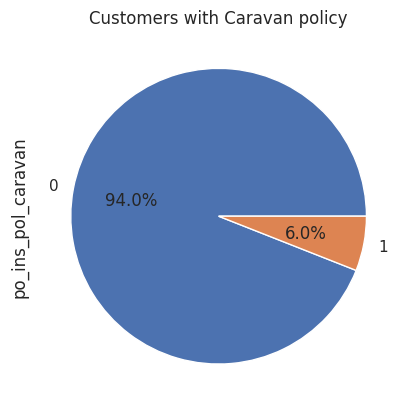

In [ ]:
summary5=df_zcd.po_ins_pol_caravan.value_counts()
summary5
summary5.plot.pie(autopct="%.1f%%",title="Customers with Caravan policy");

In [ ]:
summary5=df_zcd.po_ins_pol_caravan.value_counts()
summary5

0    5474
1     348
Name: po_ins_pol_caravan, dtype: int64

Caravan customers

In [ ]:
# filtering records of caravan policy. (target = 1 )
df_cr=df_zcd[df_zcd['po_ins_pol_caravan'] ==1]
df_cr.po_ins_pol_caravan.value_counts()

1    348
Name: po_ins_pol_caravan, dtype: int64

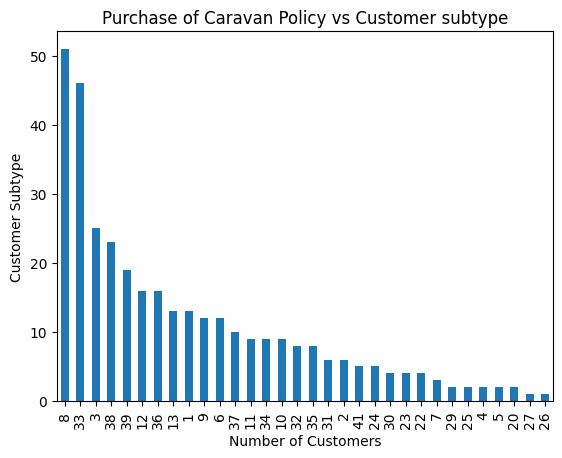

In [ ]:
summary6=df_cr.sd_cust_subtype.value_counts()
summary6.plot(kind="bar")
plt.title("Purchase of Caravan Policy vs Customer subtype")
plt.ylabel("Customer Subtype")
plt.xlabel("Number of Customers")

plt.savefig("customer subtype.png")

8    Middle class families

33  Lower class large families

3    High status seniors

38  Traditional families

39  Large religous families


♈Majority of Caravan customers are Middle class famlies and Lower class large families
♈

Cheking further some patterns of customers with filter sd_cust_subtype (3,8,12,33,36,38,39)

<Axes: xlabel='sd_cust_subtype', ylabel='sd_avg_age_band'>

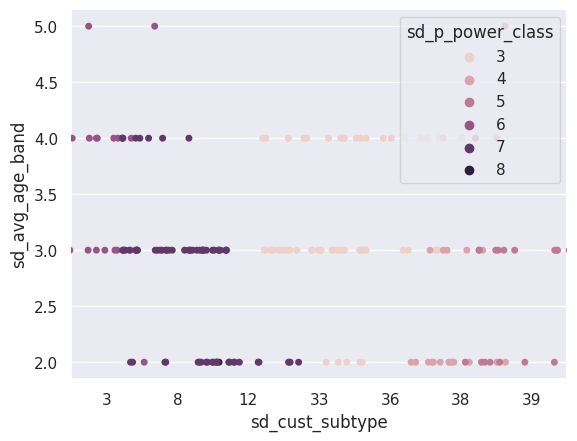

In [ ]:
df_cus_sub=df_cr.apply(lambda row: row[df_cr['sd_cust_subtype'].isin([3,8,12,33,36,38,39])])
df_cus_sub.dropna()
sns.stripplot(data=df_cus_sub, x="sd_cust_subtype", y="sd_avg_age_band", hue="sd_p_power_class", jitter=0.8)

In [ ]:
# checking counts of this scenario
df_cus_sub2=df_cus_sub.apply(lambda row: row[df_cus_sub['sd_p_power_class'].isin([7,8,9])])
df_cus_sub2.dropna()
df_cus_sub3=df_cus_sub2[['sd_cust_subtype', 'sd_avg_household', 'sd_p_power_class']]
df_cus_sub3.groupby(['sd_cust_subtype', 'sd_avg_household', 'sd_p_power_class']).value_counts()


sd_cust_subtype  sd_avg_household  sd_p_power_class
8                2                 7                   10
                 3                 7                   26
                 4                 7                   15
12               3                 7                    9
                 4                 7                    6
                                   8                    1
dtype: int64

♈ Middle class families with average household 3 or 4 has more tendency in buying a caravan policy. This is an obervation from data. We will understand it correctly as we develop the model. ♈

([<matplotlib.axis.XTick at 0x7f4083bf28f0>,
 [Text(0, 0, '3: 40-50 years'),
  Text(1, 0, '2: 30-40 years'),
  Text(2, 0, '4: 50-60 years'),
  Text(3, 0, '5: 60-70 years'),
  Text(4, 0, '1: 20-30 years'),
  Text(5, 0, '6: 70-80 years')])

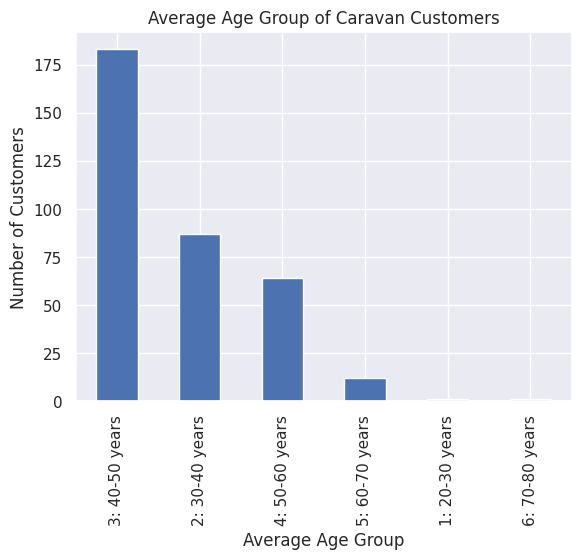

In [ ]:
summary7=df_cr.sd_avg_age_band.value_counts()
summary7.plot(kind="bar")
plt.title("Average Age Group of Caravan Customers")
plt.ylabel("Number of Customers")
plt.xlabel("Average Age Group")
plt.xticks([0,1, 2,3,4,5], ['3: 40-50 years','2: 30-40 years','4: 50-60 years', '5: 60-70 years', '1: 20-30 years',  '6: 70-80 years'],       rotation=90)

fig.savefig("Age_band1.png")

([<matplotlib.patches.Wedge at 0x7f4083c999c0>,
 [Text(-0.08927469719021958, 1.0963713004459734, '3: 40-50 years'),
  Text(-0.6417338754932398, -0.8934078760814833, '2: 30-40 years'),
  Text(0.7419282992354551, -0.8121221575561063, '4: 50-60 years'),
  Text(1.088545196091809, -0.15833305424150998, '5: 60-70 years'),
  Text(1.0995966200777703, -0.02978712999843603, '1: 20-30 years'),
  Text(1.0999551787356112, -0.009929993590624275, '6: 70-80 years')],
 [Text(-0.048695289376483396, 0.5980207093341672, '52.6%\n(183)'),
  Text(-0.35003665935994893, -0.4873133869535363, '25.0%\n(87)'),
  Text(0.4046881632193391, -0.44297572230333065, '18.4%\n(64)'),
  Text(0.5937519251409867, -0.0863634841317327, '3.4%\n(12)'),
  Text(0.5997799745878747, -0.016247525453692378, '0.3%\n(1)'),
  Text(0.599975552037606, -0.005416360140340513, '0.3%\n(1)')])

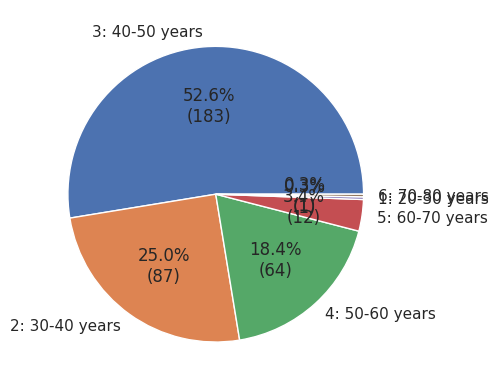

In [ ]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

summary7 = df_cr['sd_avg_age_band'].value_counts()
labelsA=['3: 40-50 years','2: 30-40 years','4: 50-60 years', '5: 60-70 years', '1: 20-30 years',  '6: 70-80 years']
#plt.pie(summary7,labels = summary7.index, autopct=autopct_format(summary7))
plt.pie(summary7,labels = labelsA, autopct=autopct_format(summary7))


♈  52.6% of caravan customers are in age group 40 - 50 years. ♈

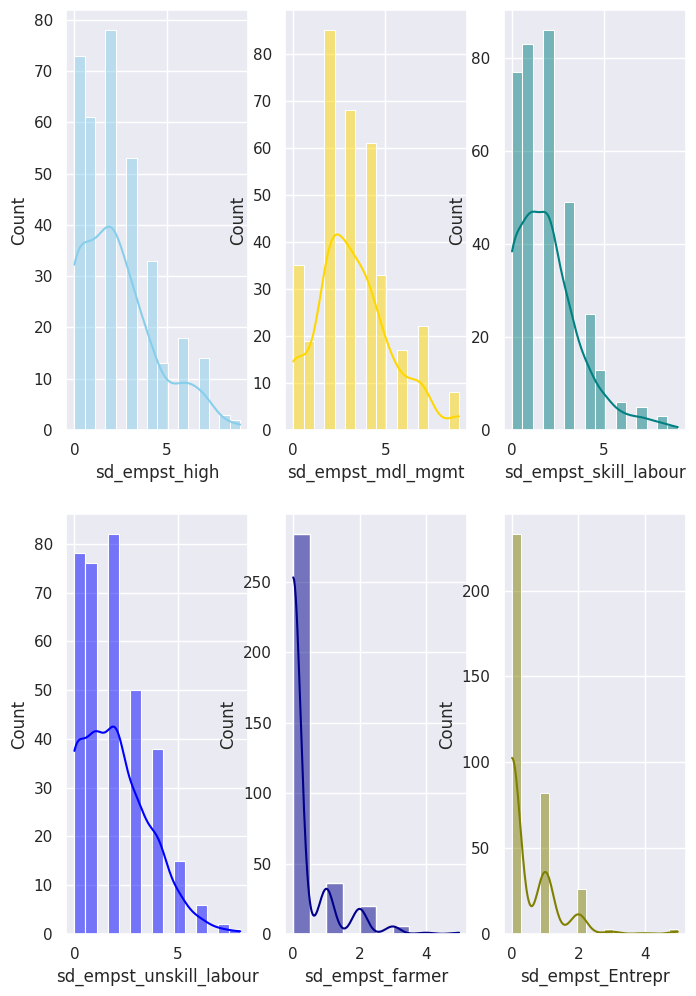

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(8, 12))

sns.histplot(data=df_cr, x="sd_empst_high", kde=True, color="skyblue",ax=axs[0, 0])
sns.histplot(data=df_cr, x="sd_empst_mdl_mgmt", kde=True, color="gold", ax=axs[0, 1])
sns.histplot(data=df_cr, x="sd_empst_skill_labour", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df_cr, x="sd_empst_unskill_labour", kde=True, color="blue", ax=axs[1, 0])
sns.histplot(data=df_cr, x="sd_empst_farmer", kde=True, color="darkblue", ax=axs[1, 1])
sns.histplot(data=df_cr, x="sd_empst_Entrepr", kde=True, color="olive", ax=axs[1, 2])

plt.show()



♈lower proportion of caravan customers are farmers of entrepreneurs. ♈

**Question** : How does Caravan Insurance ownership vary across different demographic areas?

In [ ]:
# Distribution of caravan policies by zipcode
print("record count", df_cr.shape)
#df_2_carv.head(10)
plt.close("all")
summary1=df_cr.groupby(['id_zipcode']).count()
summary2=summary1.groupby(['po_ins_pol_caravan'])['po_ins_pol_caravan'].count()
print('summary2 \n', summary2)
print('\n')


record count (348, 89)
summary2 
 po_ins_pol_caravan
1    246
2     31
3      8
4      4
Name: po_ins_pol_caravan, dtype: int64




In [ ]:
# Locations with more than one caravan customers
plt.close("all")
summary8=df_cr.groupby(['id_zipcode']).filter(lambda x: x['po_ins_pol_caravan'].sum() > 1)
summary8.groupby(['id_zipcode']).count().plot(kind='bar', y='po_ins_pol_caravan', title="Locations with more than one Caravan customers ")

KeyError: ignored

**What are demographic charactoristics of customers from in areas having more than 2 customers?**

In [ ]:
summary8=df_cr.groupby(['id_zipcode']).filter(lambda x: x['po_ins_pol_caravan'].sum() > 2)
summary8

KeyError: ignored

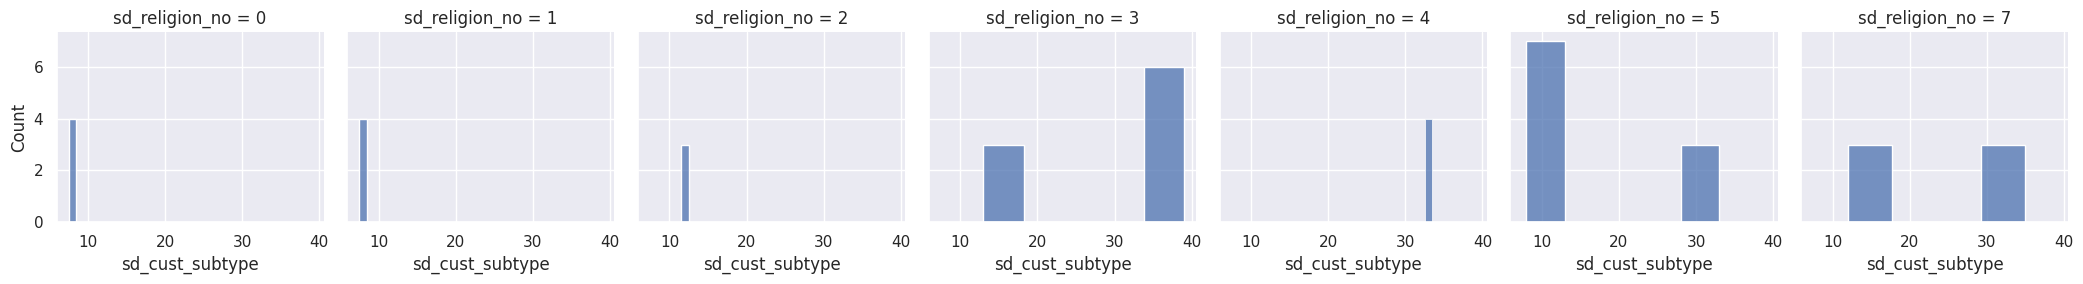

In [ ]:
g = sns.FacetGrid(summary8, col="sd_religion_no")
g.map(sns.histplot, "sd_cust_subtype")

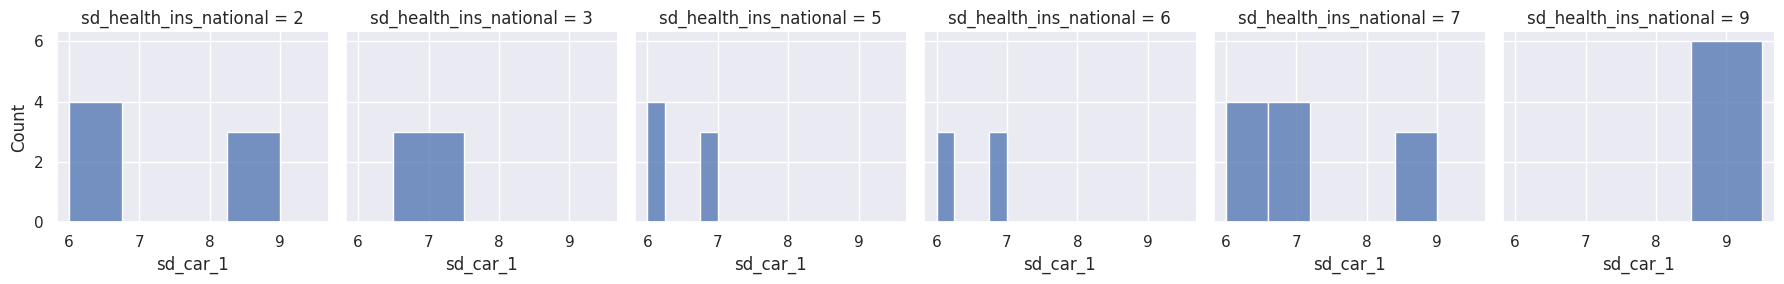

In [ ]:
g = sns.FacetGrid(summary8, col="sd_health_ins_national")
g.map(sns.histplot, "sd_car_1")

♈There are 6 customers from area with 90% national health insurance  and 90% having one car. ♈

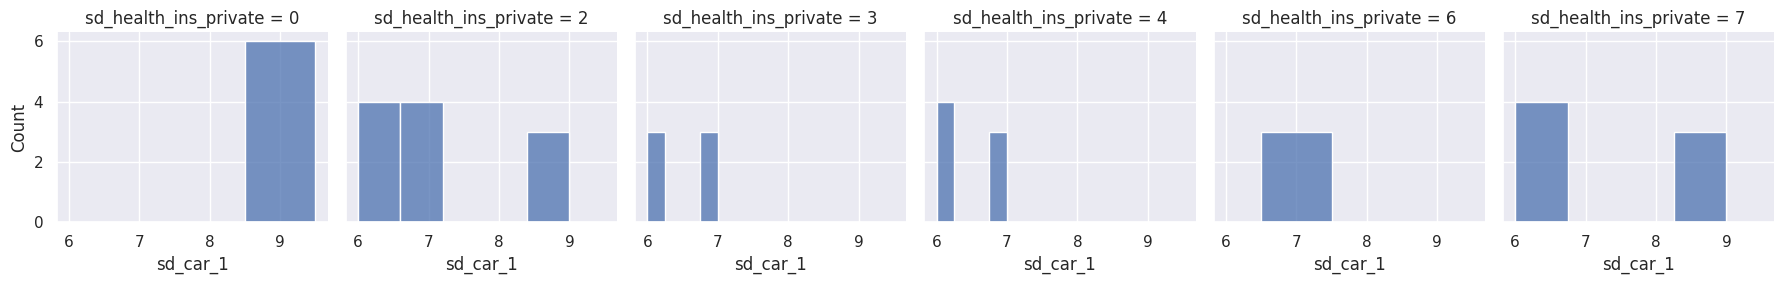

In [ ]:
g = sns.FacetGrid(summary8, col="sd_health_ins_private")
g.map(sns.histplot, "sd_car_1")

**What are other insurance products Caravan customers purchase?**

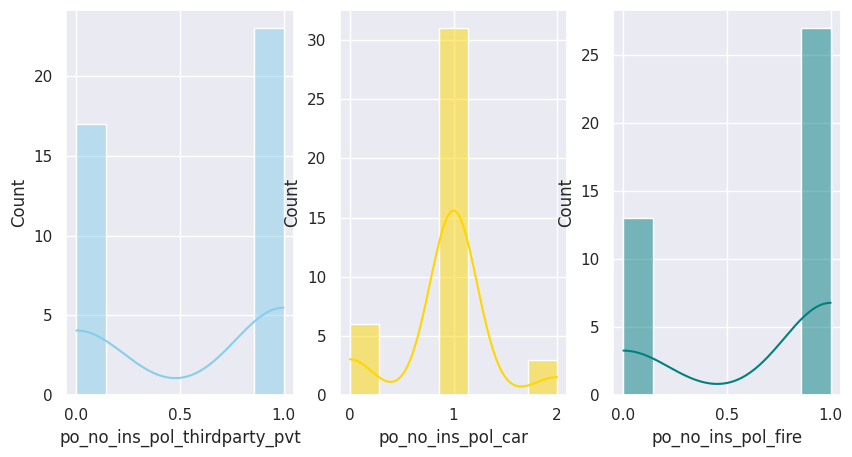

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

sns.histplot(data=summary8, x="po_no_ins_pol_thirdparty_pvt", kde=True, color="skyblue",ax=axs[0])
sns.histplot(data=summary8, x="po_no_ins_pol_car", kde=True, color="gold", ax=axs[ 1])
sns.histplot(data=summary8, x="po_no_ins_pol_fire", kde=True, color="teal", ax=axs[ 2])


plt.show()

In [ ]:
print(df_cr['po_no_ins_pol_thirdparty_pvt'].value_counts(),"\n")
print(df_cr['po_no_ins_pol_car'].value_counts())
print(df_cr['po_no_ins_pol_fire'].value_counts())



1    201
0    147
Name: po_no_ins_pol_thirdparty_pvt, dtype: int64 

1    237
0     72
2     38
3      1
Name: po_no_ins_pol_car, dtype: int64
1    232
0    109
2      7
Name: po_no_ins_pol_fire, dtype: int64


Caravan customers have 1 fire policy or 1 third party policy. Not like with all customers, caravan customers don't have low number of car policies.

NameError: ignored

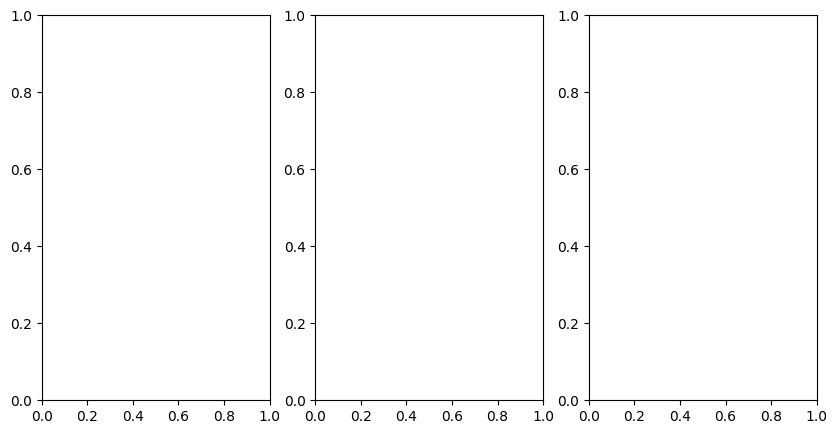

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

sns.histplot(data=summary8, x="po_ins_pol_thirdparty_pvt", kde=True, color="skyblue",ax=axs[0])
sns.histplot(data=summary8, x="po_ins_pol_car", kde=True, color="gold", ax=axs[ 1])
sns.histplot(data=summary8, x="po_ins_pol_fire", kde=True, color="teal", ax=axs[ 2])
plt.show()
plt.savefig("car pol.png")

Insurance products third party private, car and file are popular amoung  caravan customers.

♈In the data, 30 caravan customers have insured amount 6  (f 1000 – 4999) ♈

In [ ]:
df_po_no_insB = summary8[['po_no_ins_pol_thirdparty_pvt' ,	'po_no_ins_pol_thirdparty_firms' ,	'po_no_ins_pol_thirdparty_agri' ,	'po_no_ins_pol_car' ,	'po_no_ins_pol_del_van' ,	'po_no_ins_pol_motorcycle_sc' ,	'po_no_ins_pol_lorry' ,	'po_no_ins_pol_trailer' ,	'po_no_ins_pol_tractor' ,	'po_no_ins_pol_agri_machines' ,	'po_no_ins_pol_moped' ,	'po_no_ins_pol_life' ,	'po_no_ins_pol_accident_ins_pvt' ,	'po_no_ins_pol_accident_ins_fam' ,	'po_no_ins_pol_disability' ,	'po_no_ins_pol_fire' ,	'po_no_ins_pol_surfboard' ,	'po_no_ins_pol_boat' ,	'po_no_ins_pol_bicycle' ,	'po_no_ins_pol_property' ,	'po_no_ins_pol_social security' ]]
px.box(df_po_no_insB)

# 9. Corellation

In [ ]:
# these attributes have all 0. We will drop these varaibles.
#'po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'
print(df_ori['po_ins_pol_agri_machines'].value_counts(),"\n")
print(df_ori['po_ins_pol_lorry'].value_counts())
print(df_ori['po_no_ins_pol_agri_machines'].value_counts())
print(df_ori['po_no_ins_pol_lorry'].value_counts())

# we will drop these varaibles
df_3=df_ori.drop(['po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'],axis=1)
df_3.shape

0    5801
4       8
3       6
2       4
6       3
Name: po_ins_pol_agri_machines, dtype: int64 

0    5813
6       7
4       1
9       1
Name: po_ins_pol_lorry, dtype: int64
0    5801
1      12
2       6
3       2
6       1
Name: po_no_ins_pol_agri_machines, dtype: int64
0    5813
1       6
2       2
3       1
Name: po_no_ins_pol_lorry, dtype: int64


(5822, 83)

♈ Attributes 'po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry' are dropped due to no information. ( all zeros ) ♈

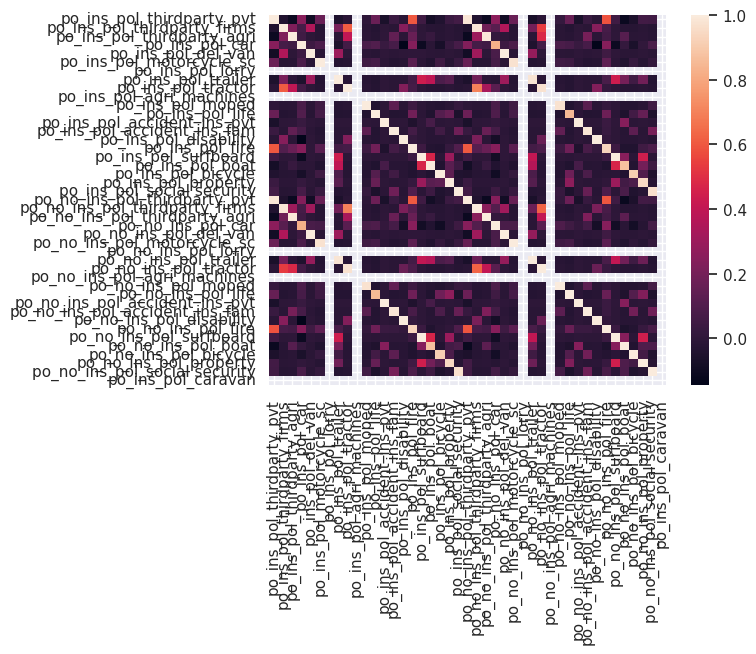

In [ ]:
# we will drop these varaibles
#df_3=df_ori.drop(['po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'],axis=1)
#df_3.shape

df_3 = df_ori

# Corellation amoung product variables
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1]
df_3_carv3 = df_3_carv2[df_3.columns[pd.Series(df_3.columns).str.startswith('po_')]]

corr1 = df_3_carv3.corr()
sns.heatmap(corr1,
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
plt.savefig("corr_matrix_1_caravan_product_columns.png", dpi=300)

In [ ]:
# these attributes have all 0. We will drop these varaibles.
#'po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'
print(df_ori['po_ins_pol_agri_machines'].value_counts(),"\n")
print(df_ori['po_ins_pol_lorry'].value_counts())
print(df_ori['po_no_ins_pol_agri_machines'].value_counts())
print(df_ori['po_no_ins_pol_lorry'].value_counts())

# Lets check corellation matix without these variables
df_3=df_ori.drop(['po_ins_pol_agri_machines','po_ins_pol_lorry', 'po_no_ins_pol_agri_machines',  'po_no_ins_pol_lorry'],axis=1)
df_3.shape

0    5801
4       8
3       6
2       4
6       3
Name: po_ins_pol_agri_machines, dtype: int64 

0    5813
6       7
4       1
9       1
Name: po_ins_pol_lorry, dtype: int64
0    5801
1      12
2       6
3       2
6       1
Name: po_no_ins_pol_agri_machines, dtype: int64
0    5813
1       6
2       2
3       1
Name: po_no_ins_pol_lorry, dtype: int64


(5822, 83)

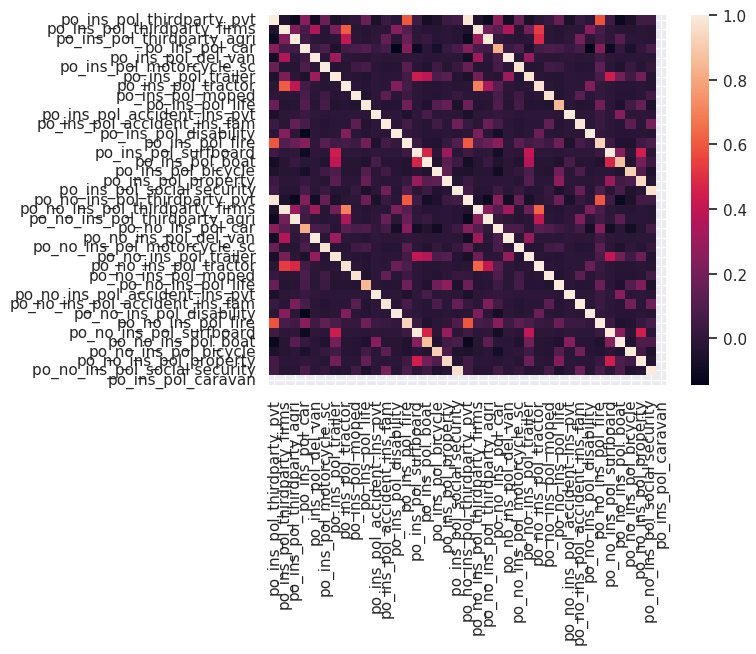

In [ ]:
# Corellation amoung product variables
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1]
df_3_carv3 = df_3_carv2[df_3.columns[pd.Series(df_3.columns).str.startswith('po_')]]

corr1 = df_3_carv3.corr()
sns.heatmap(corr1,
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
plt.savefig("corr_matrix_1_caravan_product_columns.png", dpi=300)

♈There is positive correlation in attributes po_no_ins_pol_thirdparty_firms  po_no_ins_pol_tractor. ♈

<ipython-input-288-eae7fe0ac2a0>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



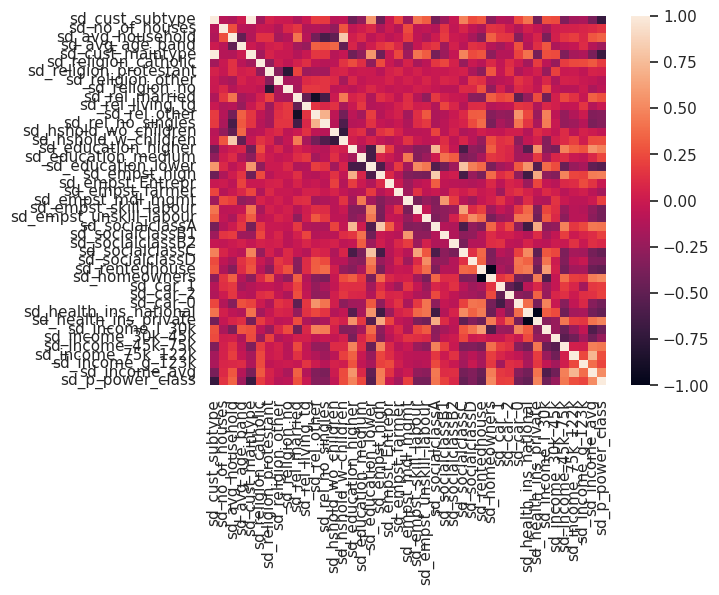

In [ ]:
# checking corelation of sociodemographic  varibles of caravan customers. (target = 1)
df_3_carv2 = df_3[df_3['po_ins_pol_caravan'] ==1]
df_3_carv3 = df_3_carv2[df_3.columns[pd.Series(df_3.columns).str.startswith('sd_')]]

corr1 = df_3_carv3.corr()
sns.heatmap(corr1,
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values)
plt.savefig("corr_matrix_1_caravan_product_columns.png", dpi=300)

♈attributes (sd_health_ins_national, sd_health_ins_private) are negatively correlated.

(sd_rentedhouse, sd_homeowners) are negatively correlated.

(sd_cust_subtype , sd_cust_maintype) are negatively correlated with sd_p_power_class

high positive correlations

(sd_cust_subtype , sd_cust_maintype)

(sd_hshold_w_children, sd_avg_household)


♈

module://matplotlib_inline.backend_inline


[Text(0, 0.5, 'sd_cust_maintype'),
 Text(0, 1.5, 'sd_religion_catholic'),
 Text(0, 2.5, 'sd_religion_protestant'),
 Text(0, 3.5, 'sd_religion_other'),
 Text(0, 4.5, 'sd_religion_no'),
 Text(0, 5.5, 'sd_rel_married'),
 Text(0, 6.5, 'sd_rel_living_tg'),
 Text(0, 7.5, 'sd_rel_other'),
 Text(0, 8.5, 'sd_rel_no_singles'),
 Text(0, 9.5, 'sd_hshold_wo_children'),
 Text(0, 10.5, 'sd_hshold_w_children'),
 Text(0, 11.5, 'sd_education_higher'),
 Text(0, 12.5, 'sd_education_medium'),
 Text(0, 13.5, 'sd_education_lower'),
 Text(0, 14.5, 'sd_empst_high'),
 Text(0, 15.5, 'sd_empst_Entrepr'),
 Text(0, 16.5, 'sd_empst_farmer'),
 Text(0, 17.5, 'sd_empst_mdl_mgmt'),
 Text(0, 18.5, 'sd_empst_skill_labour'),
 Text(0, 19.5, 'sd_empst_unskill_labour'),
 Text(0, 20.5, 'sd_socialclassA'),
 Text(0, 21.5, 'sd_socialclassB1'),
 Text(0, 22.5, 'sd_socialclassB2'),
 Text(0, 23.5, 'sd_socialclassC'),
 Text(0, 24.5, 'sd_socialclassD'),
 Text(0, 25.5, 'sd_rentedhouse'),
 Text(0, 26.5, 'sd_homeowners'),
 Text(0, 27.5, '

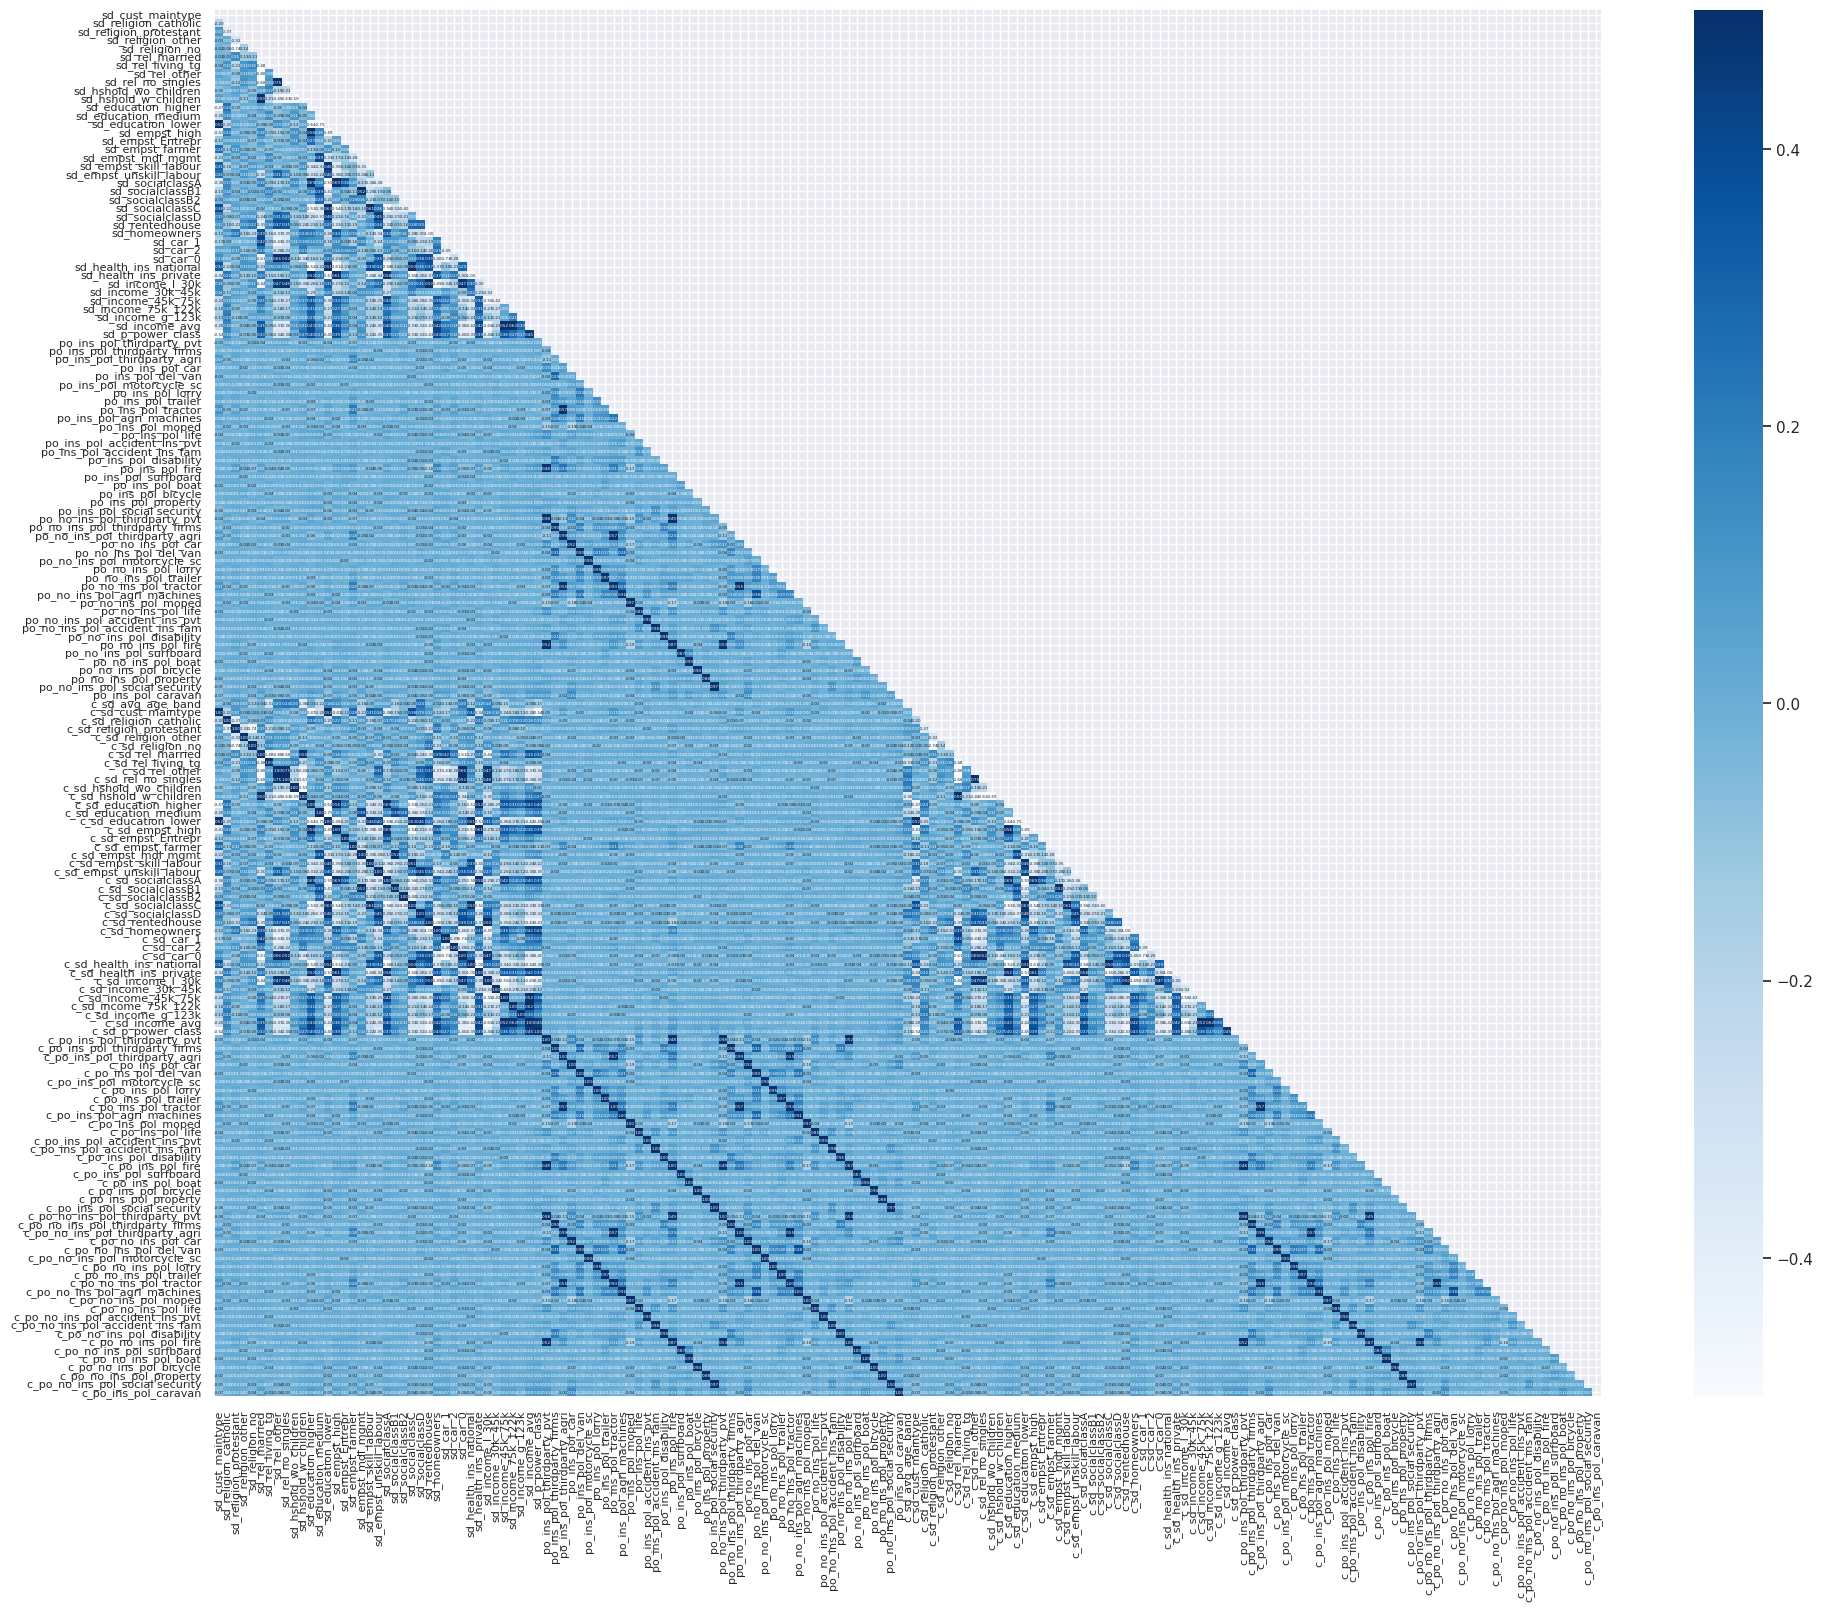

In [ ]:
# corellation matrix of all attributes

# print correlation matrix
print(plt.get_backend())

# close any existing plots
plt.close("all")

df = df_ori
# select out the desired columns
df = df.iloc[:, 3:].select_dtypes(include=['float64','int64'])

# copy columns to double size of dataframe
df2 = df.copy()
df2.columns = "c_" + df2.columns
df3 = pd.concat([df, df2], axis=1)

# get the correlation coefficient between the different columns
corr = df3.iloc[:, 1:].corr(method='pearson')
#arr_corr = corr.as_matrix()
arr_corr = corr.to_numpy()
# mask out the top triangle
arr_corr[np.triu_indices_from(arr_corr)] = np.nan

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(arr_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 3}, annot=True,
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, fontsize=8)
ax.set_yticks(ticks)
ax.set_yticklabels(corr.index, rotation=360, fontsize=8)